# Decision Tree Classification-Fraud Data Dataset

Problem Statement:
3.Build a Decision Tree & Random Forest model on the fraud data. Treat those who have   taxable_income <= 30000 as Risky and others as Good (discretize the taxable 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv("C:/Users/delll/Desktop/Python/DataSets/Fraud_check.xls")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [31]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [8]:
df["Taxable.Income"].astype(object)

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: object

In [11]:
for i in df["Taxable.Income"]:
    if i<="30000":
        df["Taxable.Income"]=np.where(df["Taxable.Income"]==i,"Risky",df["Taxable.Income"])
    else:
        df["Taxable.Income"]=np.where(df["Taxable.Income"]==i,"Good",df["Taxable.Income"])

In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [13]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [14]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

## Univariate Analysis

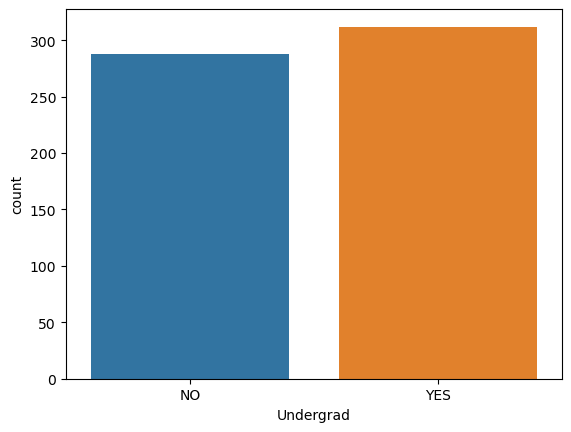

In [28]:
sns.countplot(x=df["Undergrad"])
plt.show()

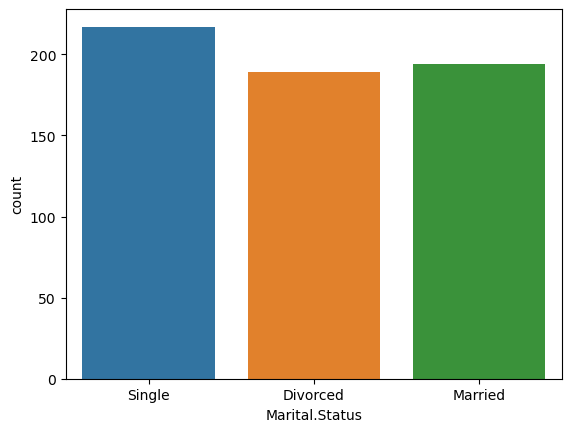

In [26]:
sns.countplot(x=df["Marital.Status"])
plt.show()

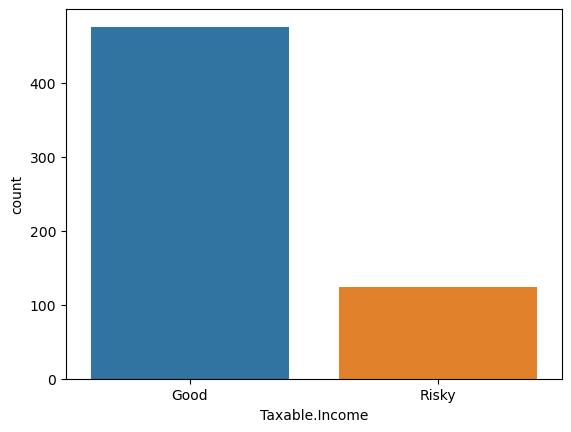

In [27]:
sns.countplot(x=df["Taxable.Income"])
plt.show()

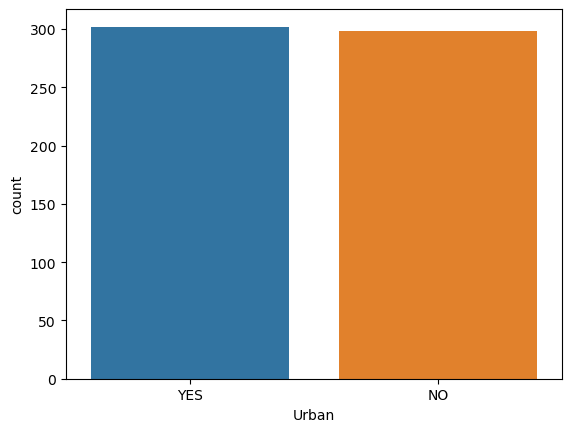

In [25]:
sns.countplot(x=df["Urban"])
plt.show()

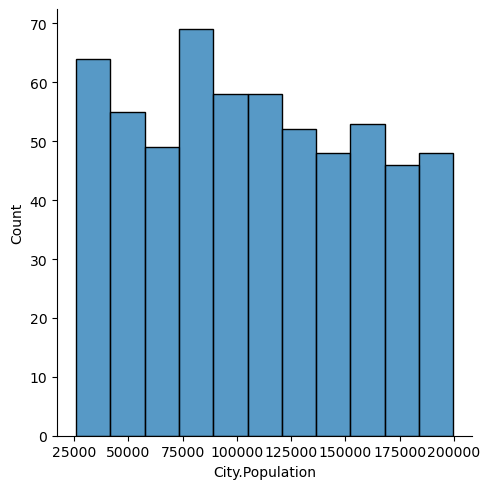

In [30]:
sns.displot(x=df["City.Population"])
plt.show()

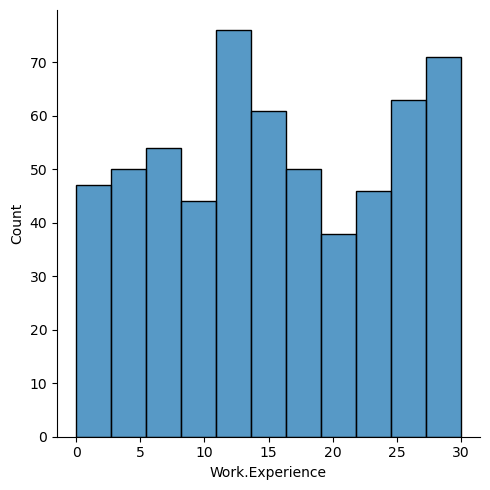

In [20]:
sns.displot(df["Work.Experience"])
plt.show()

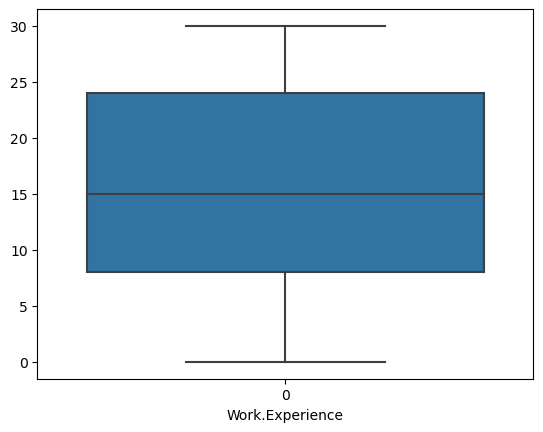

In [35]:
sns.boxplot(df["Work.Experience"])
plt.xlabel("Work.Experience")
plt.show()

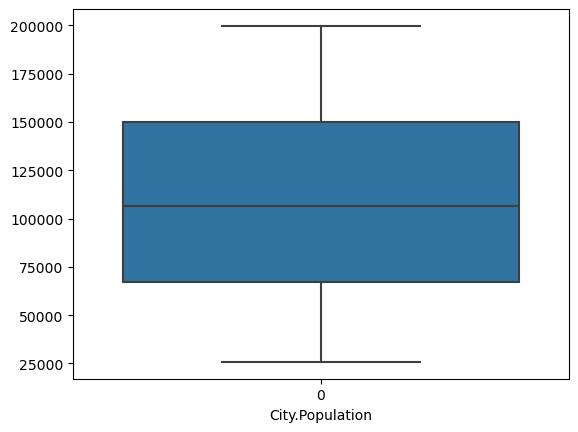

In [36]:
sns.boxplot(df["City.Population"])
plt.xlabel("City.Population")
plt.show()

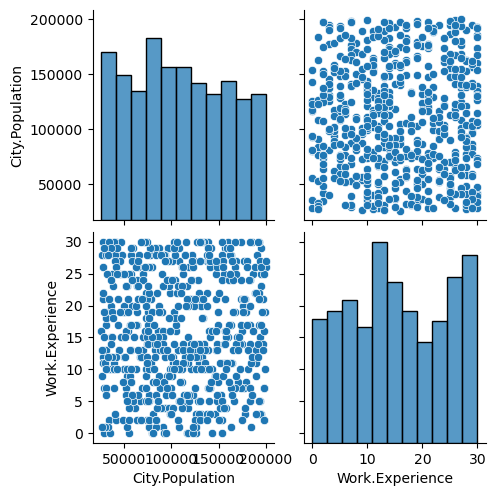

In [37]:
sns.pairplot(df)
plt.show()

In [42]:
le=LabelEncoder()
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])
df["Taxable.Income"]=le.fit_transform(df["Taxable.Income"])
df["Urban"]=le.fit_transform(df["Urban"])

In [43]:
inputs=df.drop(["Taxable.Income"],axis=1)
target=df["Taxable.Income"]

In [44]:
inputs.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [47]:
target.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

In [65]:
model=DecisionTreeClassifier()

In [66]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1])

In [68]:
acc=accuracy_score(y_test,y_pred)
acc

0.6666666666666666